## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16, ResNet152V2
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import zipfile

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [10]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):
train = './Cats_and_Dogs/train'
val =   './Cats_and_Dogs/val'
test =  './Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [11]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [4]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D((2,2)))

# 3: +Convolutional
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# 4:  +Pooling 
model.add(MaxPooling2D((2,2)))

# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# 6:  +Pooling 
model.add(MaxPooling2D((2,2)))

# 7:  +Flattening
model.add(Flatten())

# 8:  +Dense
model.add(Dense(64))
model.add(Activation('relu'))

# 9:  +Dropout
model.add(Dropout(0.5))

# 10: +Dense
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

model_history = model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples // batch_size,
                epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
                validation_data=val_generator,
                validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
312/312 [==============================] - 289s 926ms/step - loss: 0.6497 - accuracy: 0.6014 - val_loss: 0.6414 - val_accuracy: 0.7323
Epoch 2/10
312/312 [==============================] - 262s 840ms/step - loss: 0.5332 - accuracy: 0.7374 - val_loss: 0.5007 - val_accuracy: 0.7786
Epoch 3/10
312/312 [==============================] - 330s 1s/step - loss: 0.4616 - accuracy: 0.7877 - val_loss: 0.4537 - val_accuracy: 0.7733
Epoch 4/10
312/312 [==============================] - 306s 980ms/step - loss: 0.4256 - accuracy: 0.8110 - val_loss: 0.2565 - val_accuracy: 0.7964
Epoch 5/10
312/312 [==============================] - 307s 983ms/step - loss: 0.3837 - accuracy: 0.8315 - val_loss: 0.3778 - val_accuracy: 0.8050
Epoch 6/10
312/312 [==============================] - 282s 904ms/step - loss: 0.3539 - accuracy: 0.8473 - val_loss: 0.3553 - val_accuracy: 0.8343
Epoch 7/10
312/312 [==============================] - 264s 846ms/step - loss: 0.3145 - accuracy: 0.8665 - val_loss: 0.3426 - va

In [7]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 84.38%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

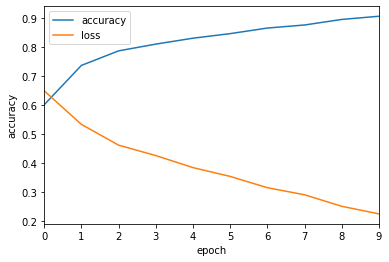

In [13]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])
plt.xlim(0,9)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='best')
plt.show()

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [3]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

*
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [4]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())

# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))
model.add(Activation('relu'))

# + Dropout
model.add(Dropout(0.5))

# + Dense layer with 1 neuron
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

E.g., it was like:


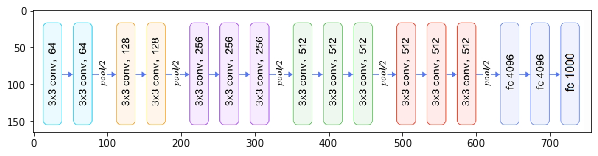

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('./VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

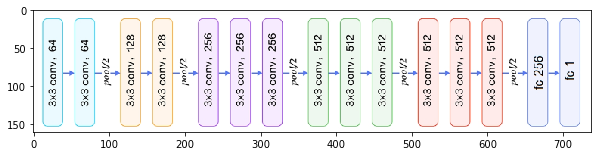

In [9]:
img = mpimg.imread('./VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [14]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
312/312 [==============================] - 2032s 7s/step - loss: 0.4991 - accuracy: 0.7502 - val_loss: 0.3464 - val_accuracy: 0.8602
Epoch 2/5
312/312 [==============================] - 2169s 7s/step - loss: 0.3398 - accuracy: 0.8522 - val_loss: 0.2952 - val_accuracy: 0.8873
Epoch 3/5
312/312 [==============================] - 2125s 7s/step - loss: 0.2967 - accuracy: 0.8745 - val_loss: 0.2690 - val_accuracy: 0.8947
Epoch 4/5
312/312 [==============================] - 2276s 7s/step - loss: 0.2731 - accuracy: 0.8855 - val_loss: 0.2527 - val_accuracy: 0.9034
Epoch 5/5
312/312 [==============================] - 1996s 6s/step - loss: 0.2567 - accuracy: 0.8920 - val_loss: 0.2444 - val_accuracy: 0.9050


In [15]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy on test data: 88.90%


In [12]:
ResNet152 = ResNet152V2(weights='imagenet', 
                        include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                        input_shape=(150, 150, 3))
ResNet152.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

ResNet152.summary()                       # pay attention to the number of trained and untrained parameters

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 77, 77, 64)   0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [13]:
model3 = Sequential()
model3.add(ResNet152)

# + flattening
model3.add(Flatten())

# + Dense fullyconnected layer with 256 neurons
model3.add(Dense(256))
model3.add(Activation('relu'))

# + Dropout
model3.add(Dropout(0.5))

# + Dense layer with 1 neuron
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               13107456  
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                

In [14]:
model3.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [15]:
model3.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=1,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
312/312 [==============================] - 2017s 6s/step - loss: 0.2370 - accuracy: 0.9369 - val_loss: 0.0886 - val_accuracy: 0.9696


In [16]:
scores = model3.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy on test data: 96.07%


Thus, the best model was based on the pre-trained ResNet152V2. The accuracy of the forecast on the test data is 96%.

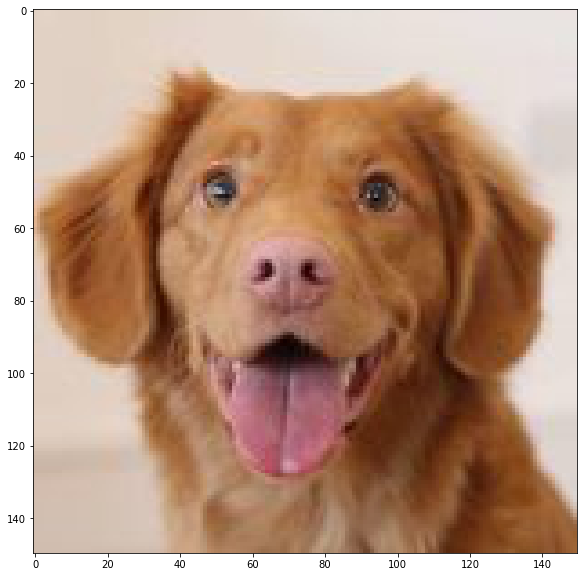

In [46]:
img = mpimg.imread('./dog_test.jpg')
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

In [47]:
import numpy as np
img = mpimg.imread('./dog_test.jpg')
img = np.reshape(img,[1,150,150,3])

def best_model(img):
    print(model3.predict_classes(img))
    
best_model(img)

[[1]]
